<a href="https://colab.research.google.com/github/Piyushke12/Deep-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
print (tf.__version__)

2.18.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide dataset into Independent and Dependent Feature
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]


In [ ]:
## Categorical Data into numeric data

geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
X = X.drop(['Geography', 'Gender'], axis=1)

In [ ]:
X = pd.concat([X, geography, gender], axis=1)

In [ ]:
## Split Train data and Test Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
## Create ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, Dropout

In [ ]:
# Initialize ANN
classifier = Sequential()

In [ ]:
# Add INPUT LAYER
classifier.add(Dense(units=11, activation='relu'))

# Drop some neurons random neurons in each epoch (Overfitting)
classifier.add(Dropout(0.3))

In [ ]:
# Add First Hidden Layer
classifier.add(Dense(units=7, activation='relu'))

classifier.add(Dropout(0.3))

In [ ]:
# ADD Second Hidden Layer
classifier.add(Dense(units=6, activation='relu'))

In [ ]:
# Add Output Layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
# Train
classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7714 - loss: 0.5215 - val_accuracy: 0.7955 - val_loss: 0.4480
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8039 - loss: 0.4542 - val_accuracy: 0.7997 - val_loss: 0.4360
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8140 - loss: 0.4308 - val_accuracy: 0.8141 - val_loss: 0.4133
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8146 - loss: 0.4228 - val_accuracy: 0.8315 - val_loss: 0.4126
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8317 - loss: 0.4022 - val_accuracy: 0.8376 - val_loss: 0.4026
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8305 - loss: 0.4038 - val_accuracy: 0.8395 - val_loss: 0.3873
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8308 - loss: 0.3877 - val_accuracy: 0.8326 - val_loss: 0.4114
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8271 - loss: 0.4091 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

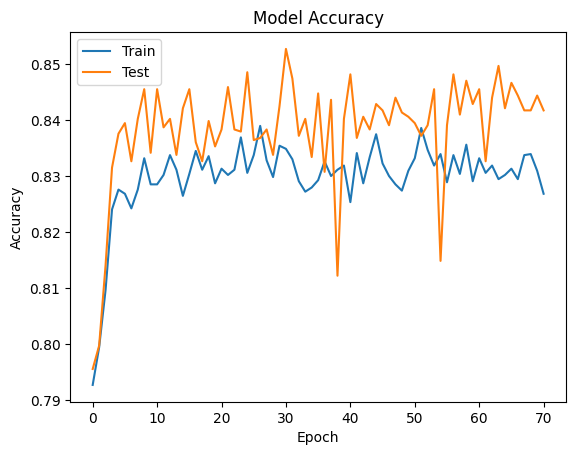

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

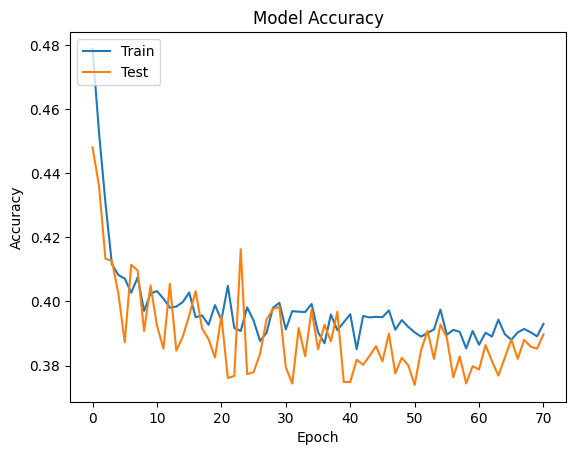

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Predict

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1576,   19],
       [ 264,  141]])

In [ ]:
# Accuracy Score
import sklearn.metrics as metrics
score = metrics.accuracy_score(y_test, y_pred)
score

0.8585

In [ ]:
classifier.get_weights()

[array([[ 7.30777502e-01,  2.11564407e-01,  3.15158337e-01,
          6.09924980e-02, -6.23360313e-02, -5.00316285e-02,
         -1.12819456e-01, -7.02133775e-02, -4.33505893e-01,
          1.32880688e+00, -1.16948798e-01],
        [-5.14709330e+00, -4.24442148e+00, -2.16207004e+00,
         -5.06079006e+00,  1.76134109e+00,  1.03780091e+00,
         -3.19575977e+00, -1.03410028e-01, -3.99131513e+00,
         -4.64256001e+00,  1.83483839e+00],
        [-6.31744504e-01, -4.75624144e-01,  3.67245644e-01,
          2.28914455e-01, -9.50886384e-02,  1.56989813e-01,
          3.51487488e-01, -2.99483180e-01,  1.27806091e+00,
         -6.77772880e-01,  4.27979618e-01],
        [ 3.43167394e-01, -1.00418374e-01, -4.01804781e+00,
         -4.27965587e-03, -5.00417292e-01,  7.09224880e-01,
          1.07822537e+00,  9.64057088e-01, -1.66257784e-01,
         -4.57577854e-01,  1.31436259e-01],
        [ 1.12832534e+00,  1.20756829e+00,  1.82641137e+00,
          9.90554571e-01, -9.09086704e-01,  